# NASA ocean color data 


This notebook demonstrates how we can access Ocean Color data from NASA.


The main repository for NASAs ocean color data is: https://oceandata.sci.gsfc.nasa.gov/opendap/

We will look at data from the MODIS-Aqua (MODIS-A) satellite, and in particular we will look at the level 3 product, which is data that has gone through the highest level of processing and nicely gridded.


NASA organizes data by year and year day. You can see this structure by clicking through the OpenDAP server. The file used in this example contains the mapped chlorophyll-a data for July 28 (year day 210), 2019.


### credit:
this lession borrowed from Tom Connolly: https://github.com/tompc35/oceanography-notebooks/blob/master/ocean_color_netcdf.ipynb

In [2]:
# import statements

%matplotlib inline 

import numpy as np

import matplotlib.pyplot as plt

import cartopy.crs as ccrs


import xarray as xr


# use `xr.open_dataset()` to access the data

the data for yearday 210 of 2019 is located at:
```python
url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/210/A2019210.L3m_DAY_CHL_chlor_a_4km.nc'
```


In [3]:

url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019/210/A2019210.L3m_DAY_CHL_chlor_a_4km.nc'
data = xr.open_dataset(url)

data

<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 4320, lon: 8640, rgb: 3)
Coordinates:
  * lat      (lat) float32 89.979164 89.9375 89.89583 ... -89.93751 -89.97918
  * lon      (lon) float32 -179.97917 -179.9375 ... 179.93752 179.97917
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    palette  (rgb, eightbitcolor) int8 ...
    chlor_a  (lat, lon) float32 ...
Attributes:
    _NCProperties:                     version=1|netcdflibversion=4.4.1.1|hdf...
    product_name:                      A2019210.L3m_DAY_CHL_chlor_a_4km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    processing_version:                2018.0
    date_created:                      2019-09-05T22:57:04.000Z
    history:                           l3ma

# Subset the data

Again, let's just grab the mid-atlantic bight.

Note, that for some reason I don't understand, the `lat` `coords` are listed from high to low, so when you slice, you need to reverse the order, i.e. use `sel( lat=slice(41, 38))` *not* `sel( lat=slice( 38, 41)`. This is a mystery.

fill in the blanks to get a subset of the data that covers the MAB (the lat boundaries at 38 to 41 degrees, and lon boundaries are -76 to -71):

```python
data_mab_nj = data.___( lat = ___, lon = ___)
```

In [4]:
data_mab_nj = data.sel( lat=slice(41, 38), lon=slice(-76,-71))

print(data_mab_nj.nbytes/10**6)

data_mab_nj

0.036096


<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 72, lon: 120, rgb: 3)
Coordinates:
  * lat      (lat) float32 40.979168 40.9375 40.895832 ... 38.0625 38.020832
  * lon      (lon) float32 -75.979164 -75.93749 ... -71.06249 -71.02083
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    palette  (rgb, eightbitcolor) int8 ...
    chlor_a  (lat, lon) float32 ...
Attributes:
    _NCProperties:                     version=1|netcdflibversion=4.4.1.1|hdf...
    product_name:                      A2019210.L3m_DAY_CHL_chlor_a_4km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    processing_version:                2018.0
    date_created:                      2019-09-05T22:57:04.000Z
    history:                           l3mapgen

# plot the chlorophyll a

for the mid atlantic bight subset using the built-in xarray plotting routine. i.e. fill in the blanks, and remember we want to just plot the variable `chlor_a`:
```python
data_mab_nj.___.___()
```



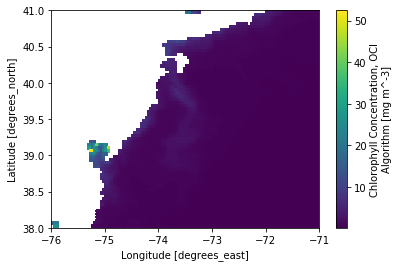

In [5]:
data_mab_nj.chlor_a.plot()

# Chla should be plotted on a log scale

Let's make the same plot with matplotlib, and use `np.log10()` to plot the data on a logarythmic scale:

```python
plt.pcolor( data_mab_nj.___, data_mab_nj.___, np.log10(data_mab_nj.___))
# add a colorbar below:
plt.___

```


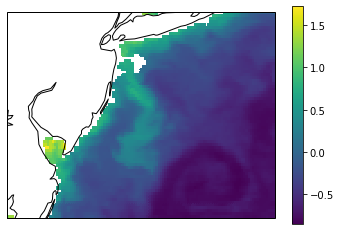

In [8]:
ax = plt.axes(projection=ccrs.Mercator())

plt.pcolor(data_mab_nj.lon, data_mab_nj.lat, np.log10(data_mab_nj.chlor_a), transform=ccrs.PlateCarree())
plt.colorbar()
ax.coastlines('50m')


# try to open multiple days

In [ ]:

base_url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2019'

# pick out days, the syntax is start day, stop day, steps between
days = np.arange(1, 300, 100)

files = [f'{base_url}/{str(day).zfill(3)}/A2019{str(day).zfill(3)}.L3m_DAY_CHL_chlor_a_4km.nc' for day in days]

files

In [ ]:
# only concat the chla, then only grab it, and subset to MAB:

ds = xr.open_mfdataset(files, concat_dim = days, data_vars=['chlor_a']).sel( lat=slice(41, 38), lon=slice(-76,-71))
ds = ds.rename({'concat_dim': 'days'})
print('data size:',ds.nbytes/1e6, 'MB')
ds

In [ ]:
# plot the data coverage in time:

nobs = ds.count('lat').count('lon')
# nobs.plot()

nobs


In [ ]:
plt.plot(nobs)